1. Load data to pandas
2. look at top 5 bottom 5 files
3. Chart, Time/Price
4. Train set 0.88, validation set 0.1 test set 0.02
5. prediction using linear regression
6. evauation lr score (?) get mape (?)
7. predict for the test dataset, R squared, explained variation, mape, mean squared error, rmse, mae
8. Plot predicted vs actual prices on chart


#### 1. Load data to pandas


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


In [21]:
data = pd.read_csv('AAPL.csv', index_col = 0)

In [22]:
data.index

Index(['2005-10-17', '2005-10-18', '2005-10-19', '2005-10-20', '2005-10-21',
       '2005-10-24', '2005-10-25', '2005-10-26', '2005-10-27', '2005-10-28',
       ...
       '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
       '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13'],
      dtype='object', name='Date', length=3732)

In [23]:
data.head()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [24]:
data.tail()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,439.46,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,454.79,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,444.45,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,450.91,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04
2020-08-13,457.72,464.17,455.71,460.04,52520500,33.532634,479.279768,345.149232,452.04,437.50,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,459.63


3. Chart, Time/Price

In [26]:
data = data.rename(columns={'Close(t)':'Close'})

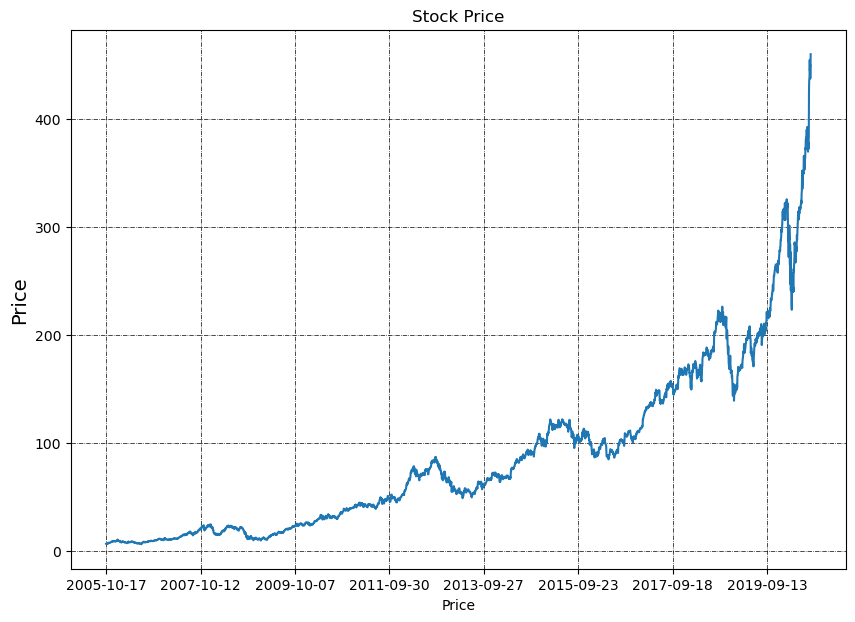

In [47]:
data['Close'].plot(figsize=(10,7))

plt.title("Stock Price")
plt.ylabel("Price", fontsize=14)
plt.xlabel("Price", fontsize=10)
plt.grid(which='major', color='k', linestyle='-.', linewidth=0.5)
plt.show()

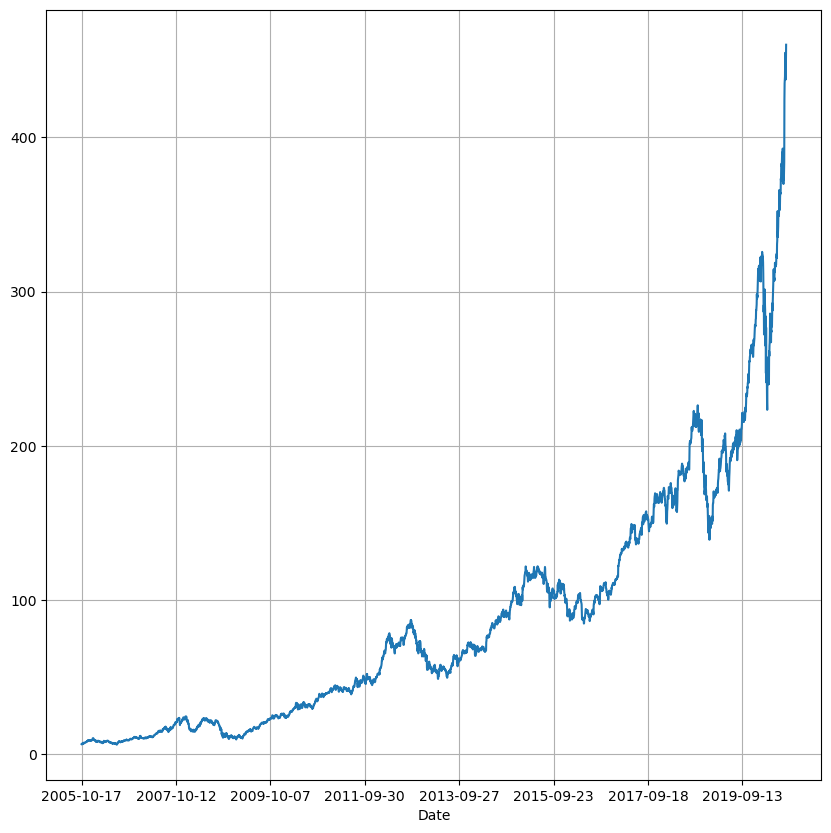

In [51]:
data['Close'].plot(figsize=(10,10))
plt.grid()

4. Train set 0.88, validation set 0.1 test set 0.02


In [79]:
from sklearn.model_selection import train_test_split 

data = data.drop(columns='Date_col')

In [105]:
train_ratio = 0.88
validation_ratio = 0.02
test_ratio = 0.10

X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['Close_forcast'], axis=1),data["Close_forcast"], test_size=1 - train_ratio)
X_val, X_test, Y_val, Y_test  = train_test_split(data.drop(columns=['Close_forcast'], axis=1),data["Close_forcast"], test_size=test_ratio/(test_ratio + validation_ratio))

In [106]:
len(X_train)

3284

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
Y_train.head


<bound method NDFrame.head of Date
2016-04-26     91.28
2009-02-27     10.86
2013-05-15     54.80
2009-04-16     15.24
2006-03-29      7.75
               ...  
2007-09-12     16.94
2015-03-03    117.76
2011-03-17     40.82
2014-05-28     82.06
2005-10-18      6.78
Name: Close_forcast, Length: 3284, dtype: float64>

In [109]:
lr = LinearRegression().fit(X_train, Y_train)

In [121]:
#######################

def predict(x, w1, w0):
    return w1 * x + w0
def compute_coefficient(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = 0
    denominator = 0

    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator += (x[i] - x_mean) ** 2

    # Calculate coefficients
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept



#####################

In [110]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-2.36786549e-01  2.88428867e-01  1.54610940e-01 -5.85754678e-01
  9.24348180e-10 -3.29811582e-03 -4.15076964e-02 -2.83127770e-02
 -7.65575122e-01 -4.52815540e-01 -2.07481407e-01 -2.98018793e-01
  5.42652222e-02 -9.41165618e-01 -6.22006548e-01 -3.49089089e-02
  3.19900241e-02  2.07851597e-02  9.34471192e-01  9.34471192e-01
  9.34471192e-01  9.34471192e-01  9.34471192e-01  3.36044774e-02
  2.13575542e-01 -2.71856052e-02  3.82748936e-03  3.21932199e-12
 -1.02675300e-02 -1.43208347e-02  5.84098692e-03  5.84098692e-03
 -1.33987652e+01 -8.45865378e-10  7.41221251e-11 -5.11036301e-02
 -1.67080515e-02  5.05992815e-02 -9.89401370e-03  3.31231172e-01
 -1.68940410e-01 -7.34380481e-01  1.18717154e-01  1.40082164e+00
 -6.49480469e-15 -1.84798650e-01 -7.92526292e-02 -1.50644763e+00
 -6.74466231e-02  5.75938576e-02 -1.34433739e-02 -3.97244170e-02
  6.76479158e-02 -6.32954213e-02  7.61037708e-02  1.26581803e-02
 -1.58914807e-02  4.41370715e-03 -2.08002938e-03  2.36274123e-03
 -5.74

In [111]:
print("Performance (R^2): ", lr.score(X_train, y_train))

Performance (R^2):  -1.0680789048809816


In [112]:
def get_mape(y_true, y_pred):
    y_true, y_pred= np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [113]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [116]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.64
Training Mean Squared Error: 5.65
Training RMSE:  2.38
Training MAE:  1.18
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 1.66
Validation Mean Squared Error: 5.65
Validation RMSE:  2.13
Validation MAE:  1.11
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 1.67
Test Mean Squared Error: 5.84
Test RMSE:  2.42
Test MAE:  1.19


In [117]:
df_pred = pd.DataFrame(Y_val.values, columns = ['Actual'], index = Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:,'Date'] = pd.to_datetime(df_pred['Date'], format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2014-03-21 00:00:00,69.25,68.383543
1,2015-03-25 00:00:00,113.82,113.153812
2,2014-10-17 00:00:00,90.64,88.432054
3,2017-12-22 00:00:00,164.43,168.493805
4,2009-06-04 00:00:00,17.86,18.002764
...,...,...,...
617,2007-11-15 00:00:00,20.54,19.922608
618,2017-02-06 00:00:00,124.78,123.371687
619,2014-02-24 00:00:00,67.05,67.647412
620,2008-11-18 00:00:00,10.65,10.784113
